In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('MSFT.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [7]:
df.shape

(9083, 7)

In [10]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

# Add trace for the closing prices
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Closing Price'))

# Customize the layout
fig.update_layout(
    title='Closing Price of Stock',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    template='plotly_white',
    width=900,
    height=500
)

# Show the plot
fig.show()


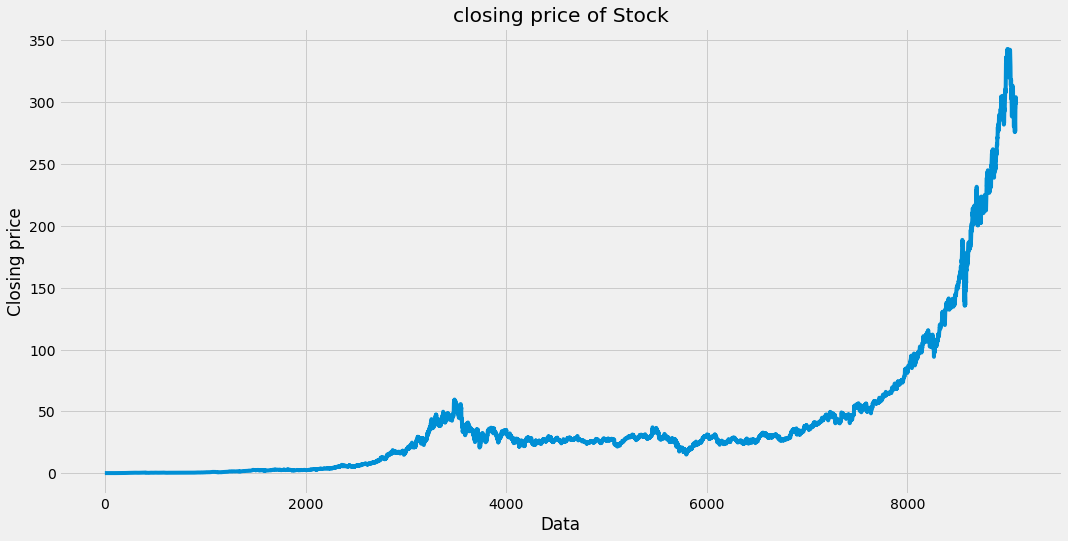

In [11]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [12]:
#create new database with only required coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

7267

In [13]:
#scale the data
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0013153162753806e-16
Standard deviation of processed data:  1.0


In [14]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [15]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [16]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


In [17]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1)) 

In [20]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 200)             │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 507,601 (1.94 MB)

 Trainable params: 507,601 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#train the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - loss: 0.0102
Epoch 2/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 40s 179ms/step - loss: 2.5628e-04
Epoch 3/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - loss: 2.1181e-04
Epoch 4/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 37s 165ms/step - loss: 1.8472e-04
Epoch 5/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - loss: 1.7375e-04


In [24]:
import plotly.graph_objects as go

# Assuming history is your training history object from Keras
# history = model.fit(...)

fig = go.Figure()

# Add trace for the loss history
fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))), y=history.history['loss'], mode='lines', name='Training Loss'))

# Customize the layout
fig.update_layout(
    title='Training Loss over Epochs',
    xaxis_title='Epoch',
    yaxis_title='Loss',
    template='plotly_white',
    width=900,
    height=500
)

# Show the plot
fig.show()


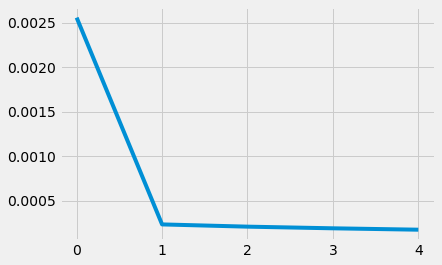

In [23]:
plt.plot(history.history['loss'])

In [16]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [17]:
#convert the data to numpy 
x_test=np.array(x_test)

In [18]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

[[ 45.66059 ]
 [ 45.713684]
 [ 45.875458]
 ...
 [239.77597 ]
 [243.18352 ]
 [245.39926 ]]
